In [57]:
import pandas as pd 

In [59]:
df = pd.read_csv ("../glue_evaluation_results.csv")

In [260]:
def query_df(
    df,
    task_name = "sst2",
    lr = 2e-05,
    midtuning = False,
    tokenizer = "roberta-base", # options: 'albert-base-v2', 'bert-base-cased'
    galactic_shift = None, # options: 'en~fr@N~fr@V', 'en~fr@N~jaktc@V', 'en~jaktc@N~jaktc@V'
    reinit_embedding = False,
    reverse_order = False,
    random_order = False,
    token_swap = False,
    word_swap = False,
):
    SPLIT = "eval"
    MODEL = "roberta-base"
    if galactic_shift is None:
        return df[
            (df["glue_task"]==task_name)&
            (df["learning_rate"]==lr)&
            (df["tokenizer"]==tokenizer)&
            (df["midtuning"]==midtuning)&
            (df['galactic_shift'].isna())&
            (df['reinit_embedding']==reinit_embedding)&
            (df['reverse_order']==reverse_order)&
            (df['random_order']==random_order)&
            (df['token_swap']==token_swap)&
            (df['word_swap']==word_swap)
        ]["performance"].values[0]
    else:
        return df[
            (df["glue_task"]==task_name)&
            (df["learning_rate"]==lr)&
            (df["tokenizer"]==tokenizer)&
            (df["midtuning"]==midtuning)&
            (df['galactic_shift']==galactic_shift)&
            (df['reinit_embedding']==reinit_embedding)&
            (df['reverse_order']==reverse_order)&
            (df['random_order']==random_order)&
            (df['token_swap']==token_swap)&
            (df['word_swap']==word_swap)
        ]["performance"].values[0]

def query_set(
    df,
    task_name = "sst2",
    tokenizer = "roberta-base", # options: 'albert-base-v2', 'bert-base-cased'
    galactic_shift = None, # options: 'en~fr@N~fr@V', 'en~fr@N~jaktc@V', 'en~jaktc@N~jaktc@V'
    reinit_embedding = False,
    reverse_order = False,
    random_order = False,
    token_swap = False,
    word_swap = False,
):
    return [
        query_df(
            df, task_name=task_name, midtuning=False, lr=2e-05, galactic_shift=galactic_shift, 
            reinit_embedding=reinit_embedding, reverse_order=reverse_order, random_order=random_order,
            token_swap=token_swap, word_swap=word_swap, tokenizer=tokenizer,
        ),
        query_df(
            df, task_name=task_name, midtuning=False, lr=4e-05, galactic_shift=galactic_shift, 
            reinit_embedding=reinit_embedding, reverse_order=reverse_order, random_order=random_order,
            token_swap=token_swap, word_swap=word_swap, tokenizer=tokenizer,
        ),
        query_df(
            df, task_name=task_name, midtuning=True, lr=2e-05, galactic_shift=galactic_shift, 
            reinit_embedding=reinit_embedding, reverse_order=reverse_order, random_order=random_order,
            token_swap=token_swap, word_swap=word_swap, tokenizer=tokenizer,
        ),
        query_df(
            df, task_name=task_name, midtuning=True, lr=4e-05, galactic_shift=galactic_shift, 
            reinit_embedding=reinit_embedding, reverse_order=reverse_order, random_order=random_order,
            token_swap=token_swap, word_swap=word_swap, tokenizer=tokenizer,
        ),
    ]

In [262]:
df["tokenizer"]

0      bert-base-cased
1      bert-base-cased
2         roberta-base
3         roberta-base
4       albert-base-v2
            ...       
567       roberta-base
568     albert-base-v2
569     albert-base-v2
570     albert-base-v2
571     albert-base-v2
Name: tokenizer, Length: 572, dtype: object

In [263]:
task_name = "mnli"
query_set(df, task_name=task_name)
query_set(df, task_name=task_name, random_order=True)
query_set(df, task_name=task_name, reverse_order=True)
query_set(df, task_name=task_name, galactic_shift="en~fr@N~fr@V")
query_set(df, task_name=task_name, galactic_shift="en~fr@N~jaktc@V")
query_set(df, task_name=task_name, galactic_shift="en~jaktc@N~jaktc@V")
query_set(df, task_name=task_name, reinit_embedding=True)
query_set(df, task_name=task_name, tokenizer="bert-base-cased", reinit_embedding=True)
query_set(df, task_name=task_name, tokenizer="albert-base-v2", reinit_embedding=True)
query_set(df, task_name=task_name, token_swap=True)
query_set(df, task_name=task_name, word_swap=True)

[0.4546102903718798, 0.4516556291390729, 0.457870606214977, 0.4526744778400408]

In [254]:
query_set(df, task_name=task_name, reinit_embedding=True)

[0.3344880285277636,
 0.31818644931227713,
 0.6993377483443709,
 0.7253183902190524]

In [255]:
query_set(df, task_name=task_name, word_swap=True)

[0.4546102903718798, 0.4516556291390729, 0.457870606214977, 0.4526744778400408]

In [256]:
query_set(df, task_name=task_name, token_swap=True)

[0.6574630667345899,
 0.6736627610799796,
 0.6849719816607234,
 0.6995415180845644]

In [257]:
query_set(df, task_name=task_name, galactic_shift="en~fr@N~fr@V")

[0.8510443199184922,
 0.8551197147223637,
 0.8547121752419765,
 0.8588894549159449]

In [209]:
query_set(df, task_name=task_name, reverse_order=True)

[0.8419765664798777,
 0.8485990830361692,
 0.8471726948548141,
 0.8573611818644932]

In [210]:
query_set(df, task_name=task_name, random_order=True)

[0.8190524707080998,
 0.8208863983698421,
 0.8195618950585838,
 0.8207845134997452]

In [264]:
query_set(df, task_name=task_name, tokenizer="bert-base-cased", reinit_embedding=True)

[0.5142129393785023,
 0.31818644931227713,
 0.7049414161996943,
 0.7170657157412125]

In [265]:
query_set(df, task_name=task_name, tokenizer="albert-base-v2", reinit_embedding=True)

[0.485175751400917,
 0.31818644931227713,
 0.7045338767193072,
 0.7287824758023433]

#### Out-dated analysis code based on wandb only

In [35]:
import wandb
api = wandb.Api()
runs = api.runs("wuzhengx/fine_tuning")
eval_metrics = {
    "sst3":"eval/Macro-F1",
    "mrpc":"eval/accuracy",
    "qnli":"eval/accuracy",
}

In [36]:
def fetch_syntactic_results(task_name):
    all_data = []
    for run in runs:
        if task_name in run.name:
            perf_metrics = run.history(keys=[eval_metrics[task_name]])[eval_metrics[task_name]]
            best_perf_metrics = max(perf_metrics)
            run_name = run.name

            name_list = run_name.split("_")
            learning_rate_found = False
            data_found = False
            reverse_found = False
            random_found = False
            inoculation_found = False
            seed_found = False
            for i in range(len(name_list)):
                if name_list[i] == "lr":
                    learning_rate_found = True
                    learning_rate = name_list[i+1]

                if name_list[i] == "seed":
                    seed_found = True
                    seed = int(name_list[i+1])
                if name_list[i] == "reverse":
                    reverse_found = True
                    if name_list[i+1] == "True":
                        reverse_order = True
                    else:
                        reverse_order = False
                if name_list[i] == "random":
                    random_found = True
                    if name_list[i+1].strip("/") == "True":
                        random_order = True
                    else:
                        random_order = False
                if name_list[i] == "data":
                    data_found = True
                    if len(name_list[i+1].split("-")) > 2:
                        perturbed_type = name_list[i+1].split("-")[2:][0]
                    else:
                        perturbed_type = "null"
                if name_list[i] == "inoculation":
                    inoculation_found = True
                    inoculation_p = float(name_list[i+1])
            # if underspecify, we just replace with default values.
            if not learning_rate_found:
                learning_rate = "2e-05"
            if not data_found:
                perturbed_type = "null"
            if not reverse_found:
                reverse_order = False
            if not random_found:
                random_order = False
            if not inoculation_found:
                inoculation_p = 0.0
            if not seed_found:
                seed = 42
            if inoculation_p == 0.0 or inoculation_p == 1.0:            
                if perturbed_type != "null":
                    all_data.append([perturbed_type, reverse_order, random_order, inoculation_p, learning_rate, seed, best_perf_metrics])
                else:
                    if "token_s_True" in run_name or "reinit_emb_True" in run_name or "word_s_True" in run_name:
                        # these conditions cannot be considered.
                        continue
                    if "reverse_True" in run_name or "random_True" in run_name:
                        all_data.append(["null", reverse_order, random_order, inoculation_p, learning_rate, seed, best_perf_metrics])
                    else:
                        # we may need to record if this is some baseline.
                        if "roberta-base_reinit_emb_False_reinit_avg_False_token_s_False_word_s_False" in run_name:
                            all_data.append(["null", False, False, 0.0, learning_rate, seed, best_perf_metrics])
                        if "roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_0.0_reverse_False_random_False" in run_name:
                            all_data.append(["null", False, False, 0.0, learning_rate, seed, best_perf_metrics])
                        if "roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_1.0_reverse_False_random_False" in run_name:
                            all_data.append(["null", False, False, 1.0, learning_rate, seed, best_perf_metrics])
    return all_data 

In [37]:
def fetch_data_tokenizer(task_name):
    all_data = []
    tokenizer_combo = ["roberta-base_albert-base-v2", "roberta-base_bert-base-cased"]
    for run in runs:
        if task_name in run.name:
            perf_metrics = run.history(keys=[eval_metrics[task_name]])[eval_metrics[task_name]]
            best_perf_metrics = max(perf_metrics)
            run_name = run.name
            is_valid = False
            for t in tokenizer_combo:
                if t in run_name:
                    if "NEED RERUN" not in run_name and "9-6" not in run_name:
                        is_valid = True
                        break
            
            name_list = run_name.split("_")
            exam_1 = False
            exam_2 = False
            exam_3 = False
            learning_rate = 2e-05
            inoculation_p = 0.0
            for i in range(len(name_list)):
                if name_list[i] == "seed":
                    seed = int(name_list[i+1])
                if name_list[i] == "reinit" and name_list[i+1] == "emb" and not exam_1:
                    exam_1 = True
                    if name_list[i+2] == "True":
                        reinit_random = True
                    else:
                        reinit_random = False
                if name_list[i] == "reinit" and name_list[i+1] == "avg" and not exam_2:
                    exam_2 = True
                    if name_list[i+2].strip("/") == "True":
                        reinit_avg = True
                    else:
                        reinit_avg = False
                if name_list[i] == "data":
                    if len(name_list[i+1].split("-")) > 2:
                        perturbed_type = "-".join(name_list[i+1].split("-")[2:])
                    else:
                        perturbed_type = "null"
                if name_list[i] == "inoculation":
                    inoculation_p = float(name_list[i+1])
                if name_list[i] == "lr":
                    learning_rate = float(name_list[i+1])
            
            if is_valid:
                model_type = name_list[4]
                tokenizer_type = name_list[5]
                all_data.append([model_type, tokenizer_type, True, reinit_avg, inoculation_p, learning_rate, seed, best_perf_metrics])

            # maybe it is other baselines?
            if "finetune_roberta-base_reinit_emb_True_reinit_avg_False" in run_name and "9-7" not in run_name and "9-8" not in run_name:
                all_data.append(["roberta-base", "roberta-base", True, False, inoculation_p, learning_rate, 42, best_perf_metrics])
            if "ft_roberta-base_reinit_emb_True_reinit_avg_False" in run_name and "9-7" not in run_name and "9-8" not in run_name:
                all_data.append(["roberta-base", "roberta-base", True, False, inoculation_p, learning_rate, 42, best_perf_metrics])
            if "finetune_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_1.0_reverse_False_random_False_reinit_emb_True_reinit_avg_False_reinit_emb_False_reinit_avg_False" in run_name:
                all_data.append(["roberta-base", "roberta-base", True, False, 1.0, 2e-5, 42, best_perf_metrics])
            if "ft_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_1.0_reverse_False_random_False_reinit_emb_True_reinit_avg_False_token_s_False_word_s_False_lr_4e-05" in run_name:
                all_data.append(["roberta-base", "roberta-base", True, False, 1.0, 4e-5, 42, best_perf_metrics])
            if "_True" not in run_name:
                if "finetune_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_0.0_reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", "roberta-base", False, False, 0.0, learning_rate, 42, best_perf_metrics])
                if "finetune_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_1.0_reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", "roberta-base", False, False, 1.0, learning_rate, 42, best_perf_metrics])
                if "ft_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_1.0_reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", "roberta-base", False, False, 1.0, learning_rate, 42, best_perf_metrics])
                if "ft_roberta-base_reinit_emb_False_reinit_avg_False_token_s_False_word_s_False" in run_name and "reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", "roberta-base", False, False, 0.0, learning_rate, 42, best_perf_metrics])
    return all_data

In [38]:
def fetch_data_swapping(task_name):
    all_data = []
    for run in runs:
        if task_name in run.name:
            run_name = run.name
            perf_metrics = run.history(keys=[eval_metrics[task_name]])[eval_metrics[task_name]]
            best_perf_metrics = max(perf_metrics)
            if "token_s_True" in run_name or "word_s_True" in run_name:
                name_list = run_name.split("_")
                learning_rate = 2e-05
                inoculation_p = 0.0
                seed_found = False
                
                for i in range(len(name_list)):
                    if name_list[i] == "seed":
                        seed_found = True
                        seed = int(name_list[i+1])
                    if name_list[i] == "inoculation":
                        inoculation_p = float(name_list[i+1])
                    if name_list[i] == "lr":
                        learning_rate = float(name_list[i+1])
                token_s = False
                word_s = False
                if "token_s_True" in run_name:
                    token_s = True
                if "word_s_True" in run_name:
                    word_s = True
                if not seed_found:
                    seed = 42
                all_data.append(["roberta-base", token_s, word_s, inoculation_p, learning_rate, seed, best_perf_metrics])
                
            if "_True" not in run_name:
                if "finetune_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_0.0_reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", False, False, 0.0, learning_rate, 42, best_perf_metrics])
                if "finetune_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_1.0_reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", False, False, 1.0, learning_rate, 42, best_perf_metrics])
                if "ft_roberta-base_roberta-base_seed_42_data_wikitext-15M_inoculation_1.0_reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", False, False, 1.0, learning_rate, 42, best_perf_metrics])
                if "ft_roberta-base_reinit_emb_False_reinit_avg_False_token_s_False_word_s_False" in run_name and "reverse_False_random_False" in run_name:
                    all_data.append(["roberta-base", False, False, 0.0, learning_rate, 42, best_perf_metrics])
                
    return all_data

In [39]:
def query_galactic(df, learning_rate, inoculation_p):
    lr_select = df[(df["lr"]==f"{learning_rate}")&(df["inoculation_p"]==inoculation_p)]

    data = [
        lr_select[(df["perturbed_type"]=="null")&(df["reverse_order"]==False)&(df["random_order"]==False)]["best_perf_metrics"].values[0],
        lr_select[(df["perturbed_type"]=="null")&(df["reverse_order"]==False)&(df["random_order"]==True)]["best_perf_metrics"].values[0],
        lr_select[(df["perturbed_type"]=="null")&(df["reverse_order"]==True)&(df["random_order"]==False)]["best_perf_metrics"].values[0],
        lr_select[(df["perturbed_type"]=="en~fr@N~fr@V")&(df["reverse_order"]==False)&(df["random_order"]==False)]["best_perf_metrics"].values[0],
        lr_select[(df["perturbed_type"]=="en~jaktc@N~jaktc@V")&(df["reverse_order"]==False)&(df["random_order"]==False)]["best_perf_metrics"].values[0],
        lr_select[(df["perturbed_type"]=="en~fr@N~jaktc@V")&(df["reverse_order"]==False)&(df["random_order"]==False)]["best_perf_metrics"].values[0],
    ]
    return data

def query_tokenizer(df, learning_rate, inoculation_p):
    lr_select = df[((df["lr"]==f"{learning_rate}")|(df["lr"]==learning_rate))&(df["inoculation_p"]==inoculation_p)]
    data = [
        lr_select[(df["model_type"]=="roberta-base")&(df["tokenizer_type"]=="roberta-base")&(df["reinit_random"]==True)&(df["reinit_avg"]==False)]["best_perf_metrics"].values[0],
        lr_select[(df["model_type"]=="roberta-base")&(df["tokenizer_type"]=="bert-base-cased")&(df["reinit_random"]==True)&(df["reinit_avg"]==False)]["best_perf_metrics"].values[0],
        lr_select[(df["model_type"]=="roberta-base")&(df["tokenizer_type"]=="albert-base-v2")&(df["reinit_random"]==True)&(df["reinit_avg"]==False)]["best_perf_metrics"].values[0],
    ]
    return data

def query_swap(df, learning_rate, inoculation_p):
    lr_select = df[((df["lr"]==f"{learning_rate}")|(df["lr"]==learning_rate))&(df["inoculation_p"]==inoculation_p)]
    data = [
        lr_select[(df["model_type"]=="roberta-base")&(df["token_swap"]==True)&(df["word_swap"]==False)]["best_perf_metrics"].values[0],
        lr_select[(df["model_type"]=="roberta-base")&(df["token_swap"]==False)&(df["word_swap"]==True)]["best_perf_metrics"].values[0],
    ]
    return data

#### Performance analysis for all experiments for a single data and a specific learning rate

In [47]:
task_name = "mrpc" # please change to the task you are analyzing.

In [48]:
syntactic_df = pd.DataFrame(
    fetch_syntactic_results(task_name),
    columns = ['perturbed_type','reverse_order','random_order', 'inoculation_p', "lr", 'seed', 'best_perf_metrics']
)

tokenizer_df = pd.DataFrame(
    fetch_data_tokenizer(task_name), 
    columns = ['model_type', 'tokenizer_type', 'reinit_random','reinit_avg', 'inoculation_p', 'lr', 'seed', 'best_perf_metrics']
).sort_values("tokenizer_type")

swap_df = pd.DataFrame(
    fetch_data_swapping(task_name), 
    columns = ['model_type', 'token_swap', 'word_swap', 'inoculation_p', 'lr', 'seed', 'best_perf_metrics']
)


/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: 

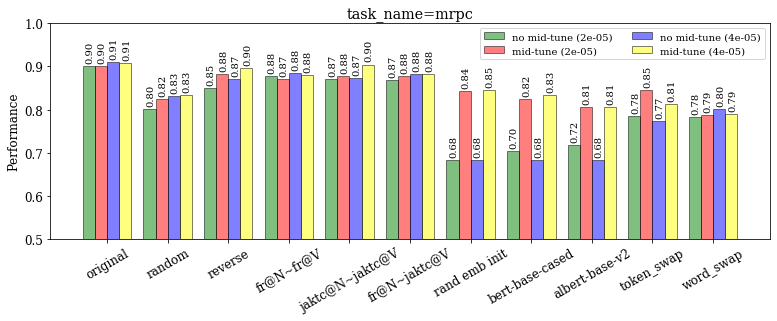

In [49]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("ggplot")

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 12}
plt.rc('font', **font)

with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):

    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_axes([0,0,1,1])

    # different learning rate
    learning_rate = 2e-05
    syntactic_data_1 = query_galactic(syntactic_df, learning_rate, 0.0)
    syntactic_data_2 = query_galactic(syntactic_df, learning_rate, 1.0)

    tokenizer_data_1 = query_tokenizer(tokenizer_df, learning_rate, 0.0)
    tokenizer_data_2 = query_tokenizer(tokenizer_df, learning_rate, 1.0)
    
    swap_data_1 = query_swap(swap_df, learning_rate, 0.0)
    swap_data_2 = query_swap(swap_df, learning_rate, 1.0)
    
    data_1 = []
    data_2 = []
    data_1.extend(syntactic_data_1)
    data_1.extend(tokenizer_data_1)
    data_1.extend(swap_data_1)
    data_2.extend(syntactic_data_2)
    data_2.extend(tokenizer_data_2)
    data_2.extend(swap_data_2)
    
    learning_rate = 4e-05
    syntactic_data_1 = query_galactic(syntactic_df, learning_rate, 0.0)
    syntactic_data_2 = query_galactic(syntactic_df, learning_rate, 1.0)

    tokenizer_data_1 = query_tokenizer(tokenizer_df, learning_rate, 0.0)
    tokenizer_data_2 = query_tokenizer(tokenizer_df, learning_rate, 1.0)
    
    swap_data_1 = query_swap(swap_df, learning_rate, 0.0)
    swap_data_2 = query_swap(swap_df, learning_rate, 1.0)
    
    data_3 = []
    data_4 = []
    data_3.extend(syntactic_data_1)
    data_3.extend(tokenizer_data_1)
    data_3.extend(swap_data_1)
    data_4.extend(syntactic_data_2)
    data_4.extend(tokenizer_data_2)
    data_4.extend(swap_data_2)
    
    groups = [
        data_1, 
        data_2,
        data_3,
        data_4,
    ]
    group_names = ['no mid-tune (2e-05)', 'mid-tune (2e-05)', 'no mid-tune (4e-05)', 'mid-tune (4e-05)',]
    groupby_names = [
        "original", "random", "reverse", "fr@N~fr@V", "jaktc@N~jaktc@V", "fr@N~jaktc@V", 
         "rand emb init", "bert-base-cased", "albert-base-v2", 
         "token_swap", "word_swap",
    ]

    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # the label
    width = 0.2  # the width of the bars
    rects0 = ax.bar(x - 1.5*width, groups[0], width, label=group_names[0], edgecolor='black', color="green", alpha=0.5)
    rects1 = ax.bar(x - width/2, groups[1], width, label=group_names[1], edgecolor='black', color="red", alpha=0.5)
    rects2 = ax.bar(x + width/2, groups[2], width, label=group_names[2], edgecolor='black', color="blue", alpha=0.5)
    rects3 = ax.bar(x + 1.5*width, groups[3], width, label=group_names[3], edgecolor='black', color="yellow", alpha=0.5)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Performance')
    ax.set_xticks(x)
    ax.set_xticklabels(groupby_names, rotation=30)
    ax.legend(
        loc='upper right', fontsize=10, ncol=2
    )
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(0.02+ rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10, rotation=90)

    autolabel(rects0)
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    
    fig.tight_layout()

    ax.set_facecolor("white")
    plt.title(f"task_name={task_name}")
    plt.ylim(0.5,1.0)
    plt.show()
    # plt.savefig("../../data-files-updated/Analysis-Result/action_sequence_length",dpi=1000, bbox_inches='tight')